In [1]:
from google.colab import drive 
drive.mount('./content')

Mounted at ./content


In [16]:
import numpy as np 
from skimage import io 
import cv2 
import scipy.io as scio
import matplotlib.pyplot as plt 

In [5]:
#load gt 
gt = scio.loadmat('/content/content/MyDrive/IN_Lab/Project/gt/gt.mat')
charBB = gt['charBB'][0]
imnames = gt['imnames'][0]

In [28]:
#load heatmap 

heatmap = np.load('/content/content/MyDrive/IN_Lab/Project/images/sample_heatmap.npy')

#threshold 
#heatmap = np.where(heatmap < 0.05 , 0 , heatmap )

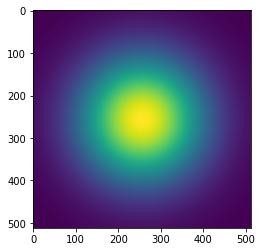

In [29]:
plt.imshow(heatmap)

In [56]:
#Parameter 
img_size = 512

In [57]:
sample_img = np.where('8/ballet_106_0.jpg' in  imnames )

In [58]:
bbox_cor = charBB[sample_img[0][0]].transpose((2,1,0))

In [59]:
bbox_cor.shape

(54, 4, 2)

In [60]:
empty_image = np.zeros((img_size, img_size))

In [75]:
col = img_size
row = img_size 

original_cor = np.float32(  [ [0,0] , [0, row] , [col,0] , [col,row]   ]  )

tmp = np.float32([bbox_cor[0][0],bbox_cor[0][1],bbox_cor[0][3],bbox_cor[0][2]])

In [77]:
mtrx = cv2.getPerspectiveTransform(original_cor , tmp)

dst = cv2.warpPerspective(heatmap , mtrx , (col , row ))

In [86]:
def generate_gt(img_size , heatmap  , bbox_cor): 

    #bbox_cor = num_image , 4point , (x,y)

    row = img_size[0]
    col = img_size[1]

    gt_image = np.zeros((row, col) , np.float32)

    original_cor = np.float32(  [ [0,0] , [0, row] , [col,0] , [col,row]  ] )

    for bbox in bbox_cor: 

        bbox = np.float32( [bbox[0] , bbox[1] , bbox[3] , bbox[2] ])

        mtrx = cv2.getPerspectiveTransform(original_cor , bbox)
        dst = cv2.warpPerspective( heatmap, mtrx , (col, row) )

        gt_image += dst 
    
    return gt_image 



In [87]:
gt_image = generate_gt(img_size = [512,512] , heatmap = heatmap , bbox_cor = bbox_cor)

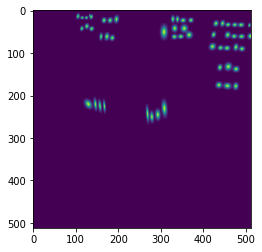

In [88]:
plt.imshow(gt_image)

In [85]:
bbox_cor.shape

(54, 4, 2)